# Testing histogram dissimilarity classifier on flood images

#### Choose base directory

In [1]:
cd ../../../../../OCTA-main

C:\Users\luisr\Desktop\Repositories\OCTA-main


#### Import modules

In [3]:
import bin.imgmanipulation as im
import bin.histogram as hist
from bin.histcomparison import HistogramDissimilarityAnalysis as HDA

### Model set up

#### Function to load model

In [4]:
import cv2 as cv

def get_hda(code):
    code_ref = f'images/{code}/reference'
    base_str = f'CODE{code}'

    base_filepath = f'{code_ref}/{base_str}_'
    code_back = cv.imread(f"{base_filepath}MEAN.jpg")
    code_mask = cv.imread(f"{base_filepath}MASK.jpg")
    code_day = cv.imread(f"{base_filepath}day.jpg")
    code_night = cv.imread(f"{base_filepath}night.jpg")
    code_puddle = cv.imread(f"{base_filepath}puddle.jpg")
    code_flood = cv.imread(f"{base_filepath}flood.jpg")

    return HDA(code, code_back,code_mask, code_day, code_night, code_puddle, code_flood)

#### Get  model instance

In [5]:
code = 1475

hda = get_hda(code)

#### Use model to predict image

In [8]:
hda.predict(img)

'alagamento'

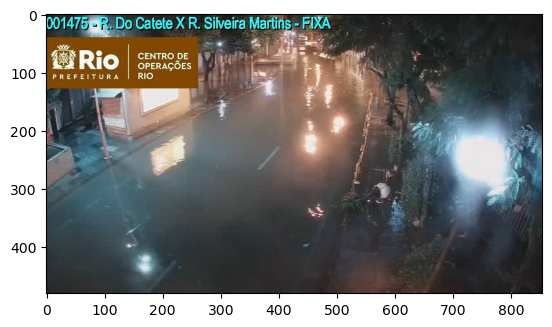

{'day': 0.3393, 'night': 0.2557, 'puddle': 0.1434, 'flood': 0.1209}


In [6]:
# path to test image
test_image_path = 'images/1475/reference/flood/CODE1475_2023-02-08 01-06-21.jpg'

# load and classify image
img = cv.imread(test_image_path)
im.show_image(img)
dict_diss = hda.dissimilarity_dict(img)

print(dict_diss)

#### Test available models

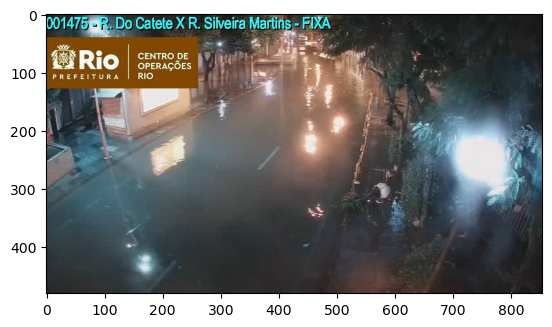

HDA MODEL FOR CODE (1475): {'day': 0.3393, 'night': 0.2557, 'puddle': 0.1434, 'flood': 0.1209}
HDA MODEL FOR CODE (1635): {'day': 0.3451, 'night': 0.4592, 'puddle': 0.2961, 'flood': 0.2709}
HDA MODEL FOR CODE (1649): {'day': 0.2537, 'night': 0.3296, 'puddle': 0.2521, 'flood': 0.2958}


In [40]:
codes = [1475, 1635, 1649]

# path to test image
test_image_path = 'images/1475/reference/flood/CODE1475_2023-02-08 01-06-21.jpg'

# load and display image
img = cv.imread(test_image_path)
im.show_image(img)

# classify image using each classifier type
for code in codes:
    hda = get_hda(code)
    dict_diss = hda.dissimilarity_dict(img)
    print(f'HDA MODEL FOR CODE ({code}):', dict_diss)